In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import configparser
import logging
from logging import Formatter
from logging.handlers import RotatingFileHandler

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

<AxesSubplot:xlabel='airline'>

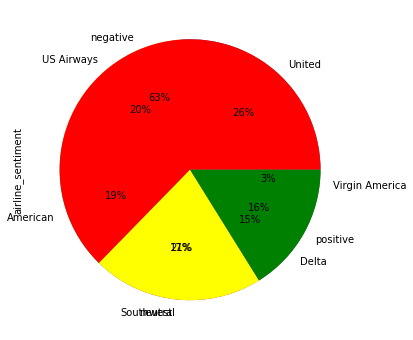

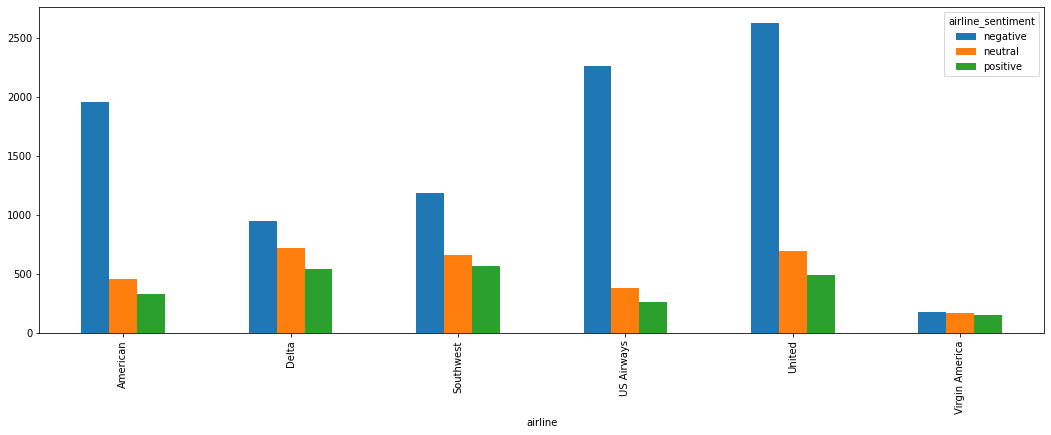

In [13]:


data_source_url = "C:/Users/krezn/PycharmProjects/NLPHelper/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)
print(airline_tweets.head())
plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])
plot_size[0] = 18
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

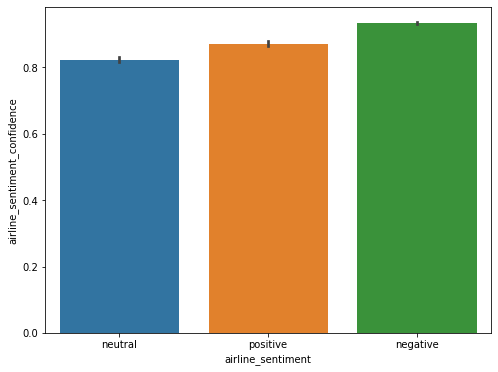

In [3]:
import seaborn as sns
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    # Converting to Lowercase
    processed_feature = processed_feature.lower()
    processed_features.append(processed_feature)

In [4]:
with open('/Users/19459820/PycharmProjects/NLPHelper/stopwords/english', 'r') as fp:
    # считываем сразу весь файл
    data = list(fp.read())

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer ( min_df=1, max_df=0.8, stop_words=data)
processed_features = vectorizer.fit_transform(processed_features).toarray()


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [7]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [8]:
predictions = text_classifier.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1796   63   11]
 [ 355  237   22]
 [ 232   50  162]]
              precision    recall  f1-score   support

    negative       0.75      0.96      0.84      1870
     neutral       0.68      0.39      0.49       614
    positive       0.83      0.36      0.51       444

    accuracy                           0.75      2928
   macro avg       0.75      0.57      0.61      2928
weighted avg       0.75      0.75      0.72      2928

0.7496584699453552


In [10]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(text_classifier, filename)

['finalized_model.sav']

In [173]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7513661202185792


In [271]:
test_url = "/Users/19459820/PycharmProjects/NLPHelper/youtuberesults-ru-1.csv"
airline_tweets = pd.read_csv(test_url)
features = airline_tweets.iloc[:, 3].values

test_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    test_feature = re.sub(r'\W', ' ', str(features[sentence]))
    # remove all single characters
    test_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', test_feature)
    # Remove single characters from the start
    test_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', test_feature)
    # Substituting multiple spaces with single space
    test_feature = re.sub(r'\s+', ' ', test_feature, flags=re.I)
    # Removing prefixed 'b'
    test_feature = re.sub(r'^b\s+', '', test_feature)
    # Converting to Lowercase
    test_feature = test_feature.lower()
    test_features.append(test_feature)

print(test_features)

['where did you get your background it is nice though', 'i 39 just starting mern full stack but man 39 feeling like code camp is throwing me warp speed into new learning modules ', 'you rock beau thanks again keep up the great work ', 'are mobile apps open to these same vulnerabilities ', 'i just started to learning thnx lot for sharing knowledge ', 'bitcoin mining using read only docker container ', 'very cool please create more videos on security', 'hi thanks for sharing the knowledge and for this course ', 'thanks for you video nice ', 'please make video on mean stack for 10 to 15 hours with multiple big projexts', 'ty 4 making this wish for more advanced follow up to this', 'after flirting with the idea of entering this space 39 ve always felt the need to learn the techniques used to build better solutions in fact this is what crippled me when ever given the idea of pursuing development know keep it simple and readable but because of how think and function just couldn 39 let this g

In [272]:
test_features = vectorizer.transform(test_features).toarray()

In [273]:
predictions = loaded_model.predict(test_features)

In [274]:
print(predictions)

['negative' 'negative' 'positive' 'neutral' 'negative' 'neutral'
 'negative' 'positive' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'neutral' 'negative' 'negative' 'neutral' 'neutral'
 'neutral' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'neutral' 'positive' 'negative' 'negative' 'neutral'
 'negative' 'negative' 'positive' 'negative' 'neutral' 'neutral'
 'negative' 'positive' 'neutral' 'positive' 'negative' 'negative'
 'negative' 'negative' 'positive' 'neutral' 'negative' 'neutral' 'neutral'
 'negative' 'positive' 'negative' 'negative' 'neutral' 'negative']


In [253]:
test_features = []

for sentence in range(0, len(comment_payload)):
    # Remove all the special characters
    test_feature = re.sub(r'\W', ' ', str(comment_payload[sentence]))
    # remove all single characters
    test_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', test_feature)
    # Remove single characters from the start
    test_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', test_feature)
    # Substituting multiple spaces with single space
    test_feature = re.sub(r'\s+', ' ', test_feature, flags=re.I)
    # Removing prefixed 'b'
    test_feature = re.sub(r'^b\s+', '', test_feature)
    # Converting to Lowercase
    test_feature = test_feature.lower()
    test_features.append(test_feature)

print(test_features)

['thanks lot', 'thanks for the amazing video is part two out ', 'hi guys great tutorial thanks for sharing it with us am not sure why this is happening but on the morphological analysis the token2 morph gives type error typeerror _repr_ returned non string type list anyone can explain to me why this is happening am using google colab thank you in advance', 'google colab has an old version of spacy br br do this br br pip install spacy 3 0 1 br import spacy br python spacy download en_core_web_sm', 'i can 39 believe such good content is for free thank you ', 'i am trying to find the files the instructor is using where are they cannot find any link to download them', 'thank you for this fantastic video here 39 one question from vscode user display render doc2 style 39 dep 39 has no reaction tried to find solutions on stack overflow but failed anyone can help many thanks ', 'so what happened to br quot neuro linguistic programming quot ', 'best helpline for those who really want to learn'

In [254]:
test_features = vectorizer.transform(test_features).toarray()

In [255]:
predictions = loaded_model.predict(test_features)

In [280]:
predictions = list(predictions)
pos_count = predictions.count('positive')
neg_count = predictions.count('negative')
neu_count = predictions.count('neutral')
print(pos_count)
print(neg_count)
print(neu_count)

10
31
15


In [277]:
youtube_url = 'http://www.youtube.com/watch?v=ZFqlHhCNBOI'

regex = re.compile(r'(https?://)?(www\.)?(youtube|youtu|youtube-nocookie)\.(com|be)/(watch\?v=|embed/|v/|.+\?v=)?(?P<id>[A-Za-z0-9\-=_]{11})')

match = regex.match(youtube_url)

if not match:
    print('no match')
print(match.group('id'))

ZFqlHhCNBOI
